In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
 
import numpy as np
 
import matplotlib.pyplot as plt

In [ ]:
model = keras.applications.VGG16(weights='imagenet')

553467904/553467096 [==============================] - 3s 0us/step


In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

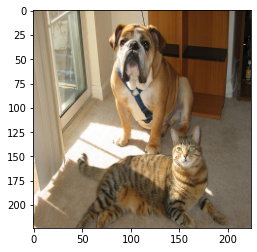

In [ ]:
_img = keras.preprocessing.image.load_img('cat_dog_1.png',target_size=(224,224))
plt.imshow(_img)
plt.show()

In [ ]:
img = keras.preprocessing.image.img_to_array(_img)
img = img.reshape((1, *img.shape))
y_pred = model.predict(img)
print(np.argmax(y_pred))

254


In [ ]:
#calculate gradient w.r.t top class score to see which pixels contribute the most
images = tf.Variable(img, dtype=float)

with tf.GradientTape() as tape:
    pred = model(images, training=False)
    class_ids_sorted = np.argsort(pred.numpy().flatten())[::-1]
    loss = pred[0][class_ids_sorted[0]]
    
grads = tape.gradient(loss, images)

In [ ]:
class_ids_sorted.shape

(1000,)

In [ ]:
loss.shape

TensorShape([])

In [ ]:
pred.shape

TensorShape([1, 1000])

In [ ]:
grads.shape

TensorShape([1, 224, 224, 3])

In [ ]:
dgrad_abs = tf.math.abs(grads)

In [ ]:
#max of the absolute values of the gradient along each RGB channel will give the saliency map
dgrad_max_ = np.max(dgrad_abs, axis=3)[0]


In [ ]:
dgrad_max_.shape

(224, 224)

In [ ]:
## normalize to range between 0 and 1
arr_min, arr_max  = np.min(dgrad_max_), np.max(dgrad_max_)
grad_eval = (dgrad_max_ - arr_min) / (arr_max - arr_min + 1e-18)

In [ ]:
grad_eval.shape

(224, 224)

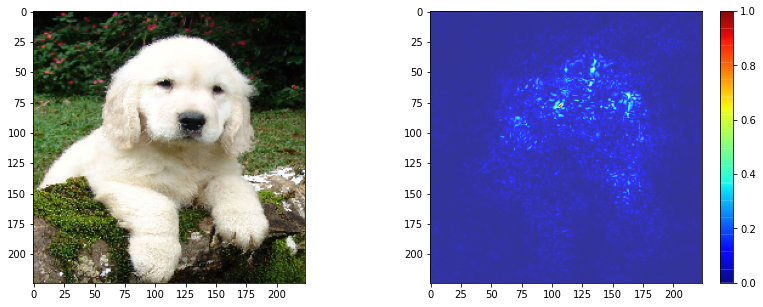

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(14,5))
axes[0].imshow(_img)
i = axes[1].imshow(grad_eval,cmap="jet",alpha=0.8)
fig.colorbar(i)

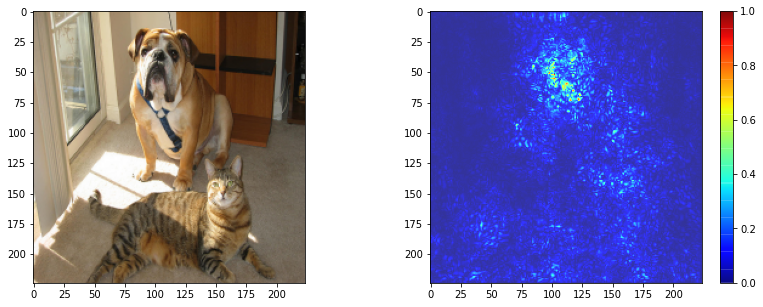

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(14,5))
axes[0].imshow(_img)
i = axes[1].imshow(grad_eval,cmap="jet",alpha=0.8)
fig.colorbar(i)